# Basic Libraries

In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,roc_auc_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Load the Datasets

In [2]:
# Train data
train_df = pd.read_csv('train.csv')

In [3]:
# Test data
test_df = pd.read_csv('test.csv')

# Copy of Datasets

In [4]:
train = train_df.copy()
test = test_df.copy()

In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train.shape

(8693, 14)

In [7]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
test.shape

(4277, 13)

**Variables in Dataset**

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Dataset Info

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## Check for Missing values

In [11]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

**Dropping 'PassengerId' and 'Name' which are not required as of now**

In [13]:
train = train.drop(['PassengerId','Name'],axis=1)

# Descriptive Statistics

In [14]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [15]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


# Data Preprocessing

## Missing value treatment

In [16]:
# Train data
train.isnull().sum()/len(train)*100

HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Transported     0.000000
dtype: float64

In [17]:
for i in train.columns:
    if train[i].dtypes == 'O':
        train[i] = train[i].fillna(train[i].mode()[0])

In [18]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [19]:
train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train[['RoomService','FoodCourt','ShoppingMall','Spa',
                                                                          'VRDeck']].fillna(0)

In [20]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [21]:
# Test data
test.isnull().sum()/len(test)*100

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

In [22]:
for i in test.columns:
    if test[i].dtypes == 'O':
        test[i] = test[i].fillna(test[i].mode()[0])

In [23]:
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [24]:
test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test[['RoomService','FoodCourt','ShoppingMall','Spa',
                                                                          'VRDeck']].fillna(0)

In [25]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [26]:
train[['Deck','CabinNum','Side']] = train['Cabin'].str.split('/',expand=True)

In [27]:
train = train.drop(['Cabin'],axis=1)

In [28]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNum,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  CabinNum      8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [30]:
train['CabinNum'] = pd.to_numeric(train['CabinNum'])
train[['CryoSleep','VIP']] = train[['CryoSleep','VIP']].astype(object)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  CabinNum      8693 non-null   int64  
 13  Side          8693 non-null   object 
dtypes: bool(1), float64(6), int64(1), object(6)
memory usage: 891.5+ KB


In [32]:
test[['Deck','CabinNum','Side']] = test['Cabin'].str.split('/',expand=True)

In [33]:
test = test.drop(['Cabin'],axis=1)

In [34]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,CabinNum,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [35]:
test['CabinNum'] = pd.to_numeric(test['CabinNum'])
test[['CryoSleep','VIP']] = test[['CryoSleep','VIP']].astype(object)

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   object 
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
 11  Name          4277 non-null   object 
 12  Deck          4277 non-null   object 
 13  CabinNum      4277 non-null   int64  
 14  Side          4277 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 501.3+ KB


## Duplicate Records

In [37]:
train.duplicated().sum()

25

In [38]:
train.loc[train.duplicated()]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNum,Side
470,Europa,True,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,True,B,19,S
617,Europa,True,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,True,C,25,S
2084,Mars,True,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,True,F,448,P
2640,Earth,True,55 Cancri e,3.0,False,0.0,0.0,0.0,0.0,0.0,True,G,450,S
3027,Europa,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,True,C,123,S
3234,Earth,False,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,True,G,571,P
3276,Earth,True,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,True,G,577,P
3279,Europa,True,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,True,G,734,S
3384,Earth,False,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,True,G,734,S
4181,Europa,True,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,0.0,True,B,145,P


In [39]:
train.drop_duplicates(inplace=True)

In [40]:
train.duplicated().sum()

0

In [41]:
test.duplicated().sum()

0

In [42]:
test.drop_duplicates(inplace=True)

In [43]:
test.duplicated().sum()

0

# Exploratory Data Analysis(EDA)

## Univariate Analysis

In [44]:
# Exploring Target Variable
train['Transported'].value_counts()

True     4355
False    4313
Name: Transported, dtype: int64

**Note:**

    - 4355 passengers are transported safely and 4313 passengers are not transported.
    - Hence, it is a balanced dataset.

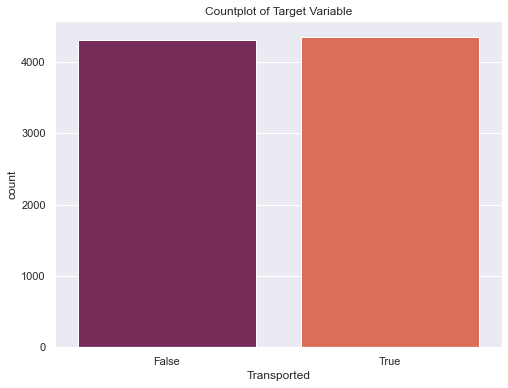

In [45]:
plt.figure(figsize=(8,6))

sns.countplot(x = train['Transported'],palette='rocket')
plt.title('Countplot of Target Variable')
plt.show()

In [46]:
numerical = train.select_dtypes(include=['float64','int64'])
categorical = train.select_dtypes('object')

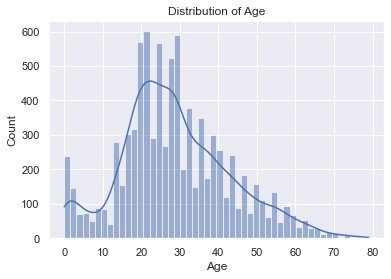

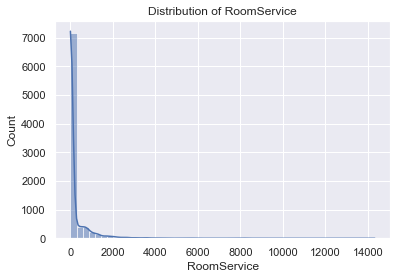

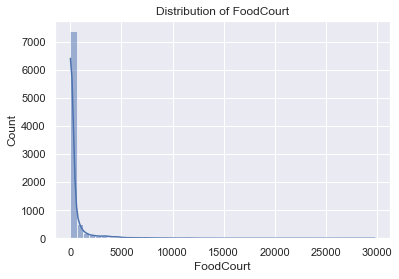

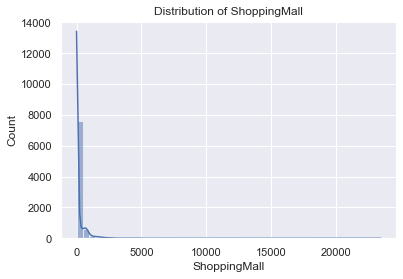

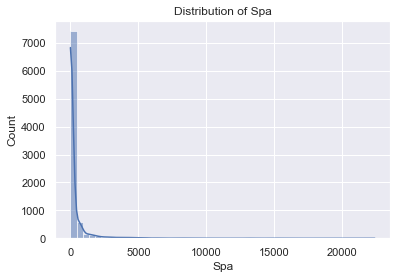

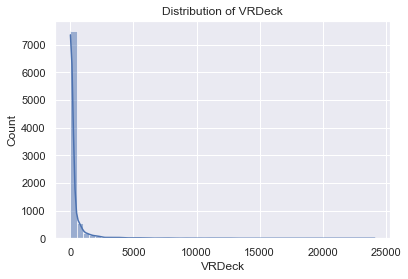

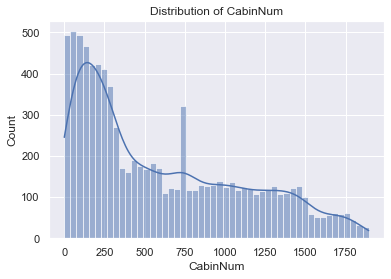

In [47]:
for i in numerical.columns:
    plt.title(f'Distribution of {i}')
    sns.histplot(x = i, data = train, bins=50, kde=True)
    plt.show()

In [48]:
for i in categorical.columns:
    values = train[i].value_counts()
    print(i)
    print(values)
    print('*'*25)

HomePlanet
Earth     4794
Europa    2122
Mars      1752
Name: HomePlanet, dtype: int64
*************************
CryoSleep
False    5651
True     3017
Name: CryoSleep, dtype: int64
*************************
Destination
TRAPPIST-1e      6082
55 Cancri e      1790
PSO J318.5-22     796
Name: Destination, dtype: int64
*************************
VIP
False    8469
True      199
Name: VIP, dtype: int64
*************************
Deck
F    2789
G    2743
E     876
B     777
C     745
D     477
A     256
T       5
Name: Deck, dtype: int64
*************************
Side
S    4470
P    4198
Name: Side, dtype: int64
*************************


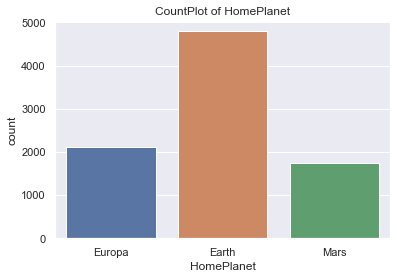

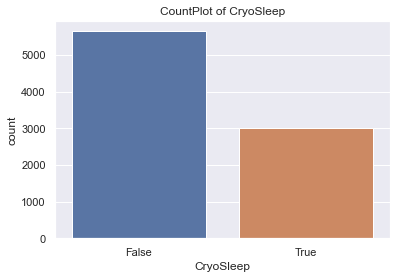

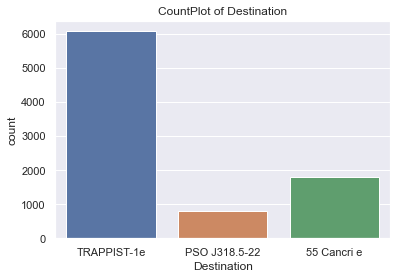

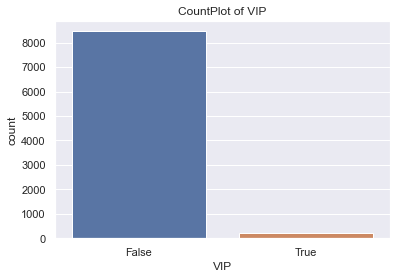

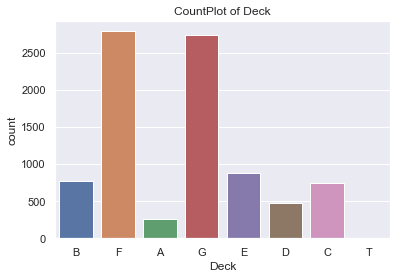

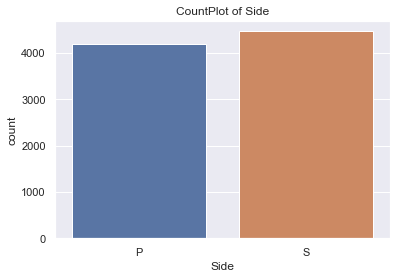

In [49]:
for i in categorical.columns:
    plt.title(f'CountPlot of {i}')
    sns.countplot(x = i, data = train)
    plt.show()

In [50]:
categorical.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side'], dtype='object')

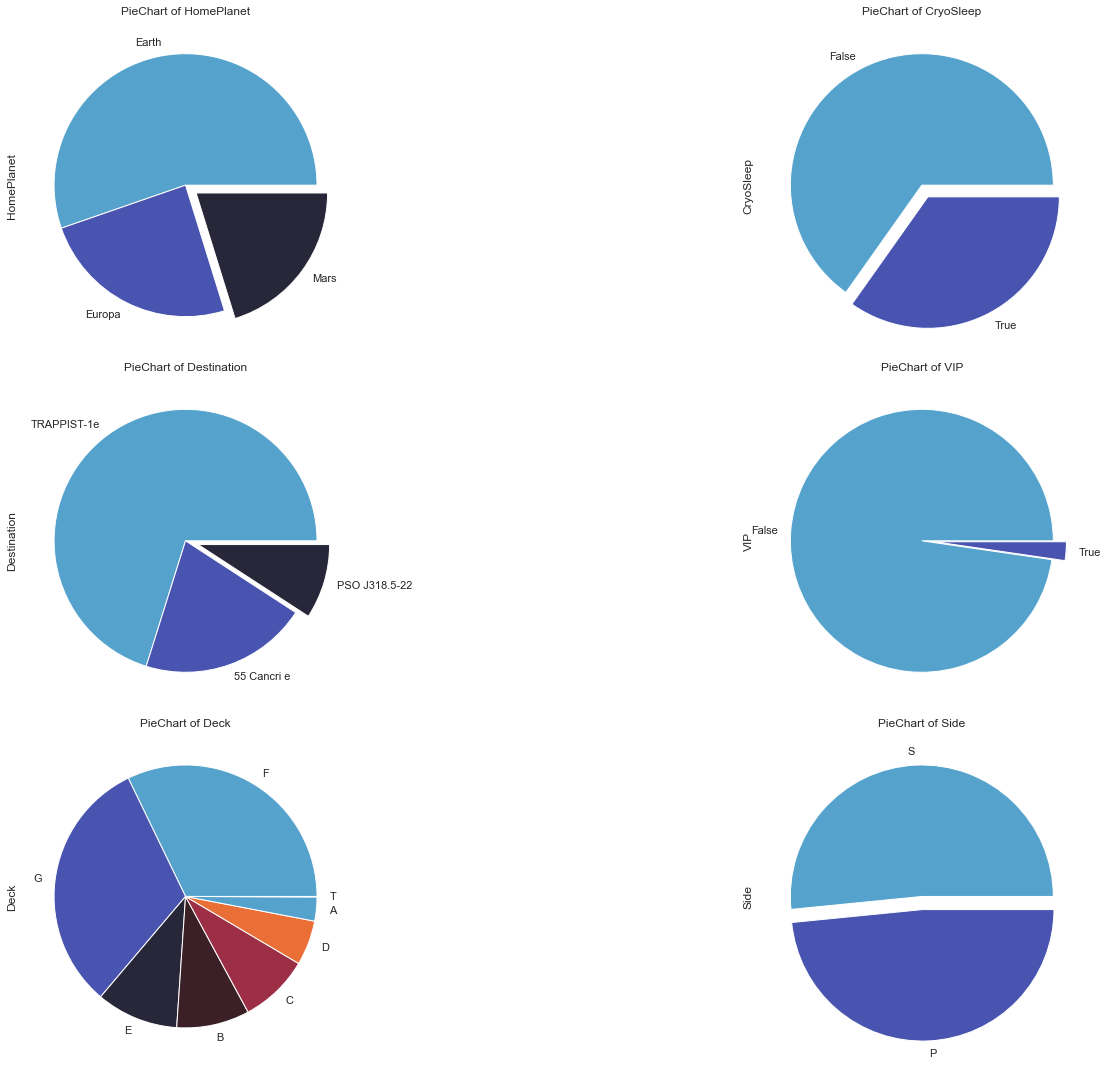

In [51]:
plt.figure(figsize=(25,15))

# Subplot of HomePlanet
plt.subplot(3,2,1)
plt.title('PieChart of HomePlanet')
colors = sns.color_palette('icefire')
train['HomePlanet'].value_counts().plot(kind='pie',colors=colors,explode=(0,0,0.1))

# Subplot of CryoSleep
plt.subplot(3,2,2)
plt.title('PieChart of CryoSleep')
colors = sns.color_palette('icefire')
train['CryoSleep'].value_counts().plot(kind='pie',colors=colors,explode=(0,0.1))

# Subplot of Destination
plt.subplot(3,2,3)
plt.title('PieChart of Destination')
colors = sns.color_palette('icefire')
train['Destination'].value_counts().plot(kind='pie',colors=colors,explode=(0,0,0.1))

# Subplot of VIP
plt.subplot(3,2,4)
plt.title('PieChart of VIP')
colors = sns.color_palette('icefire')
train['VIP'].value_counts().plot(kind='pie',colors=colors,explode=(0,0.1))

# Subplot of Deck
plt.subplot(3,2,5)
plt.title('PieChart of Deck')
colors = sns.color_palette('icefire')
train['Deck'].value_counts().plot(kind='pie',colors=colors)

# Subplot of Side
plt.subplot(3,2,6)
plt.title('PieChart of Side')
colors = sns.color_palette('icefire')
train['Side'].value_counts().plot(kind='pie',colors=colors,explode=(0,0.1))

plt.tight_layout()

plt.show()

## Bivariate Analysis

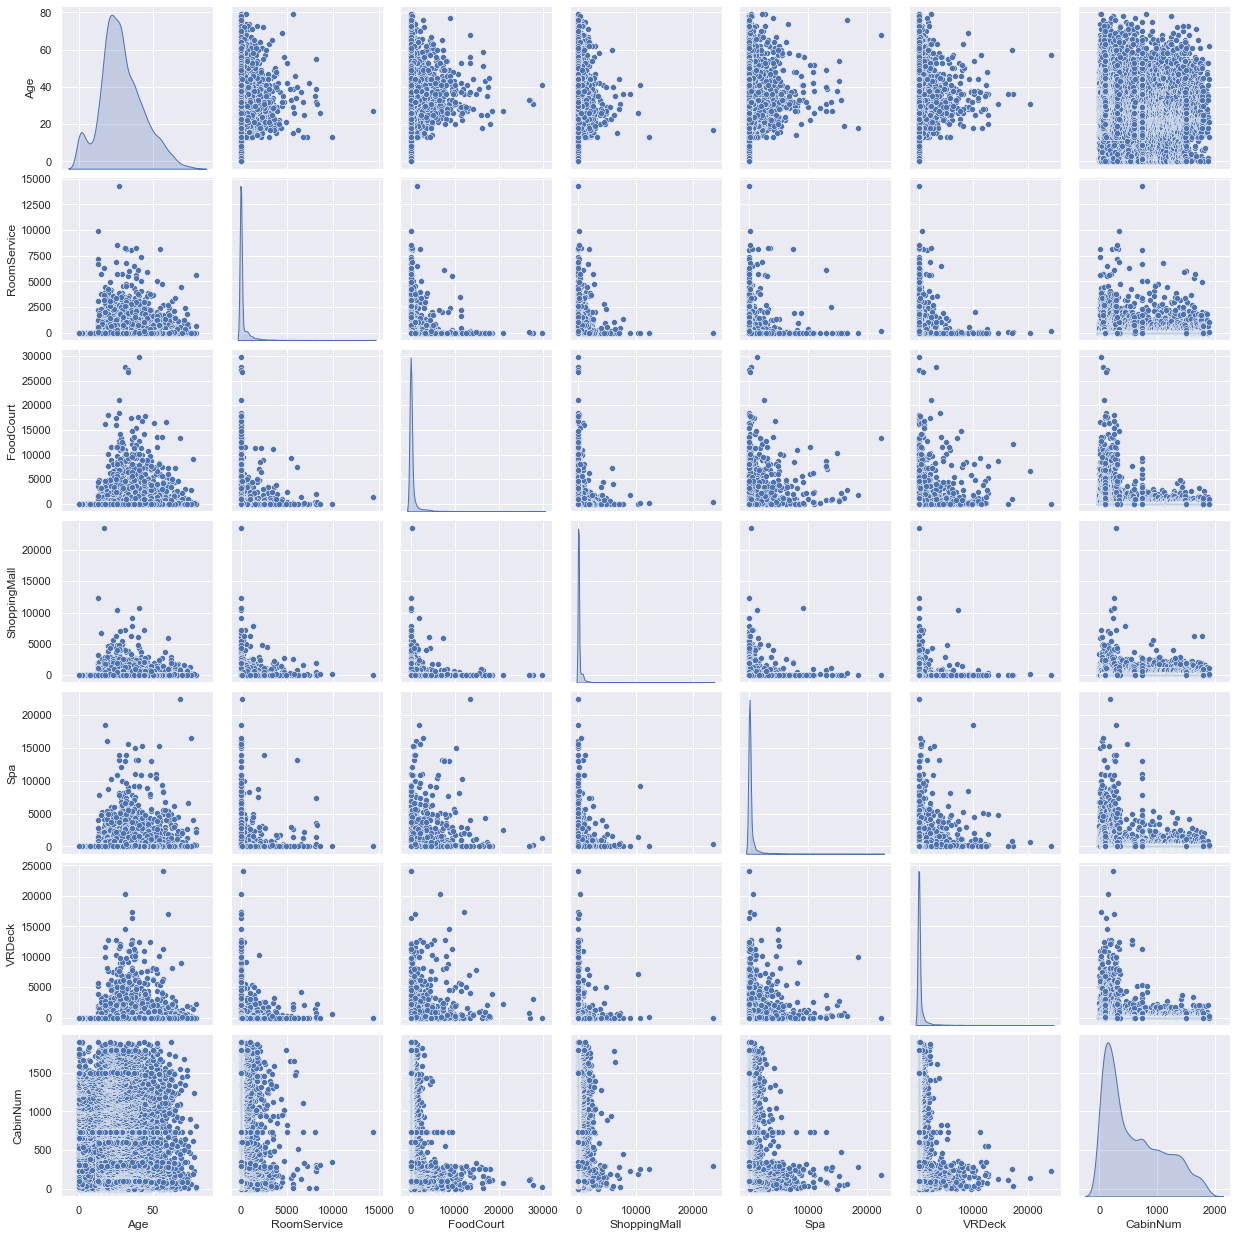

In [52]:
sns.pairplot(numerical,diag_kind='kde')
plt.show()

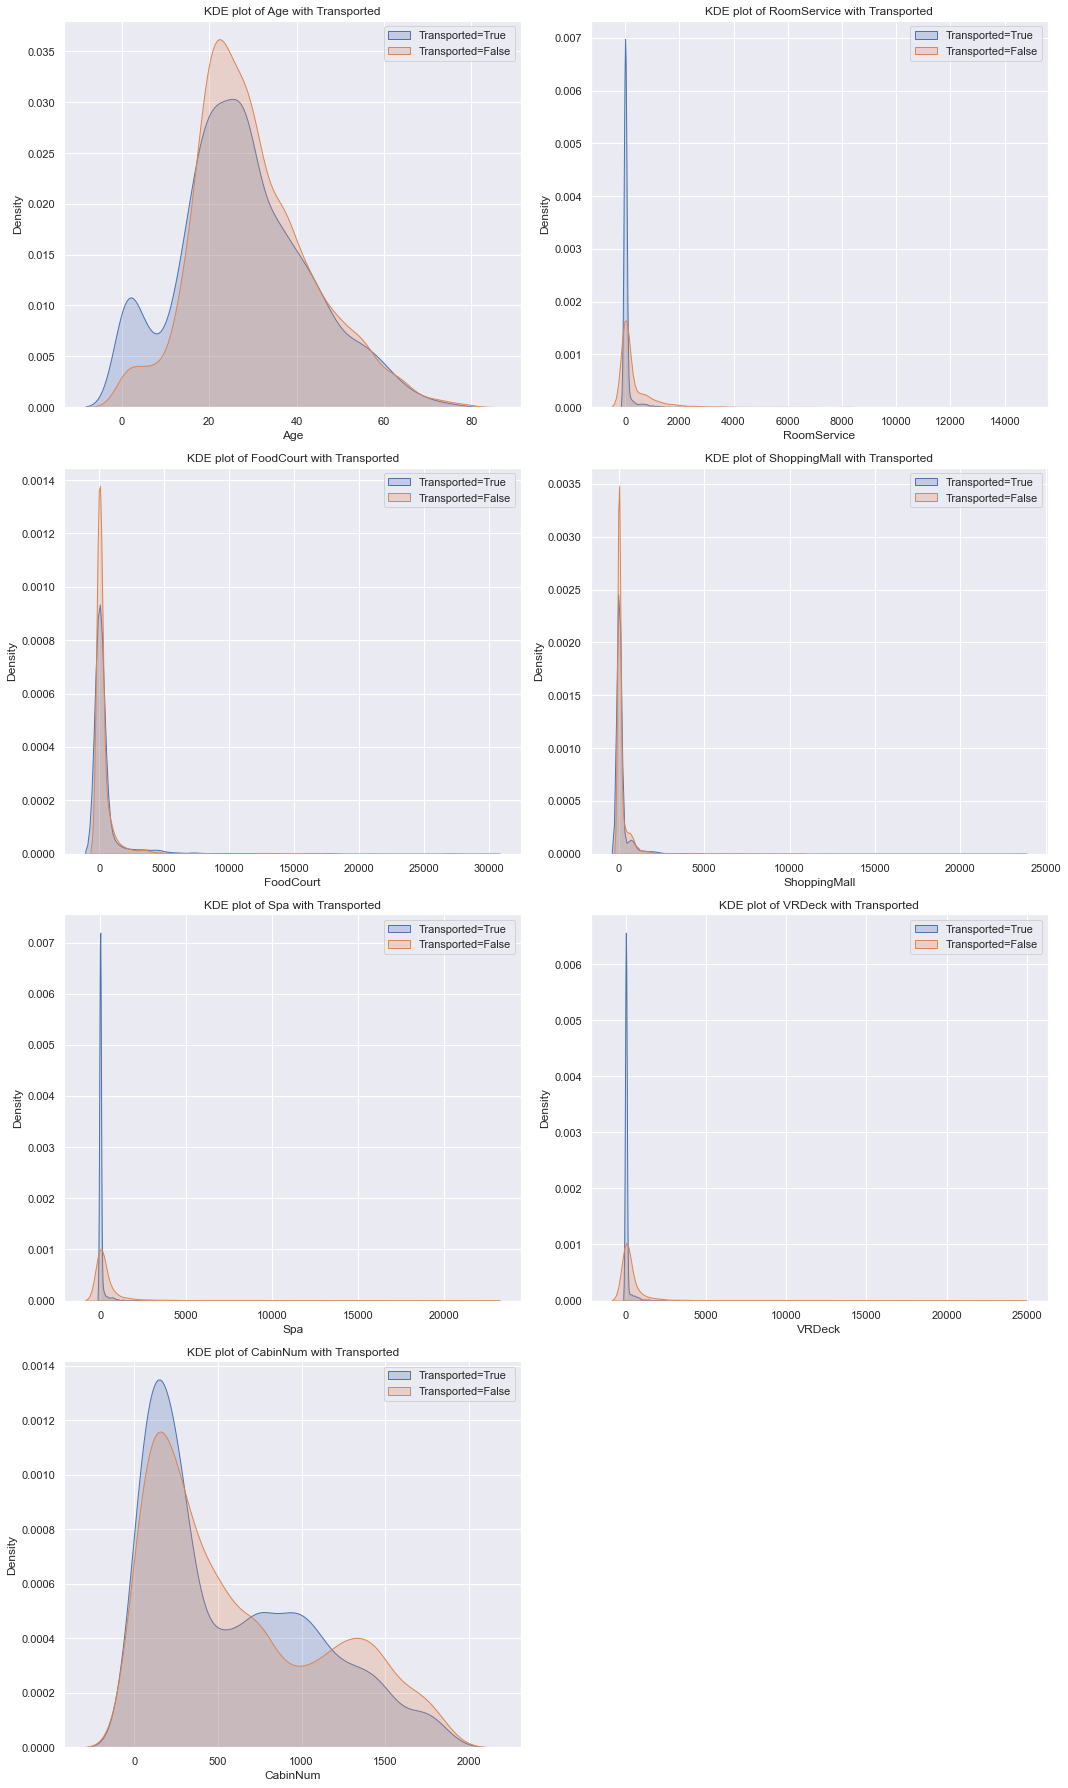

In [53]:
num_col = len(numerical.columns)
num_rows = (num_col + 1) // 2

plt.figure(figsize=(15,25))

for i,column in enumerate(numerical.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=train[train['Transported'] == True][column], label='Transported=True', fill=True)
    sns.kdeplot(data=train[train['Transported'] == False][column], label='Transported=False', fill=True)
    plt.title(f'KDE plot of {column} with Transported')
    plt.legend()

plt.tight_layout()
plt.show()

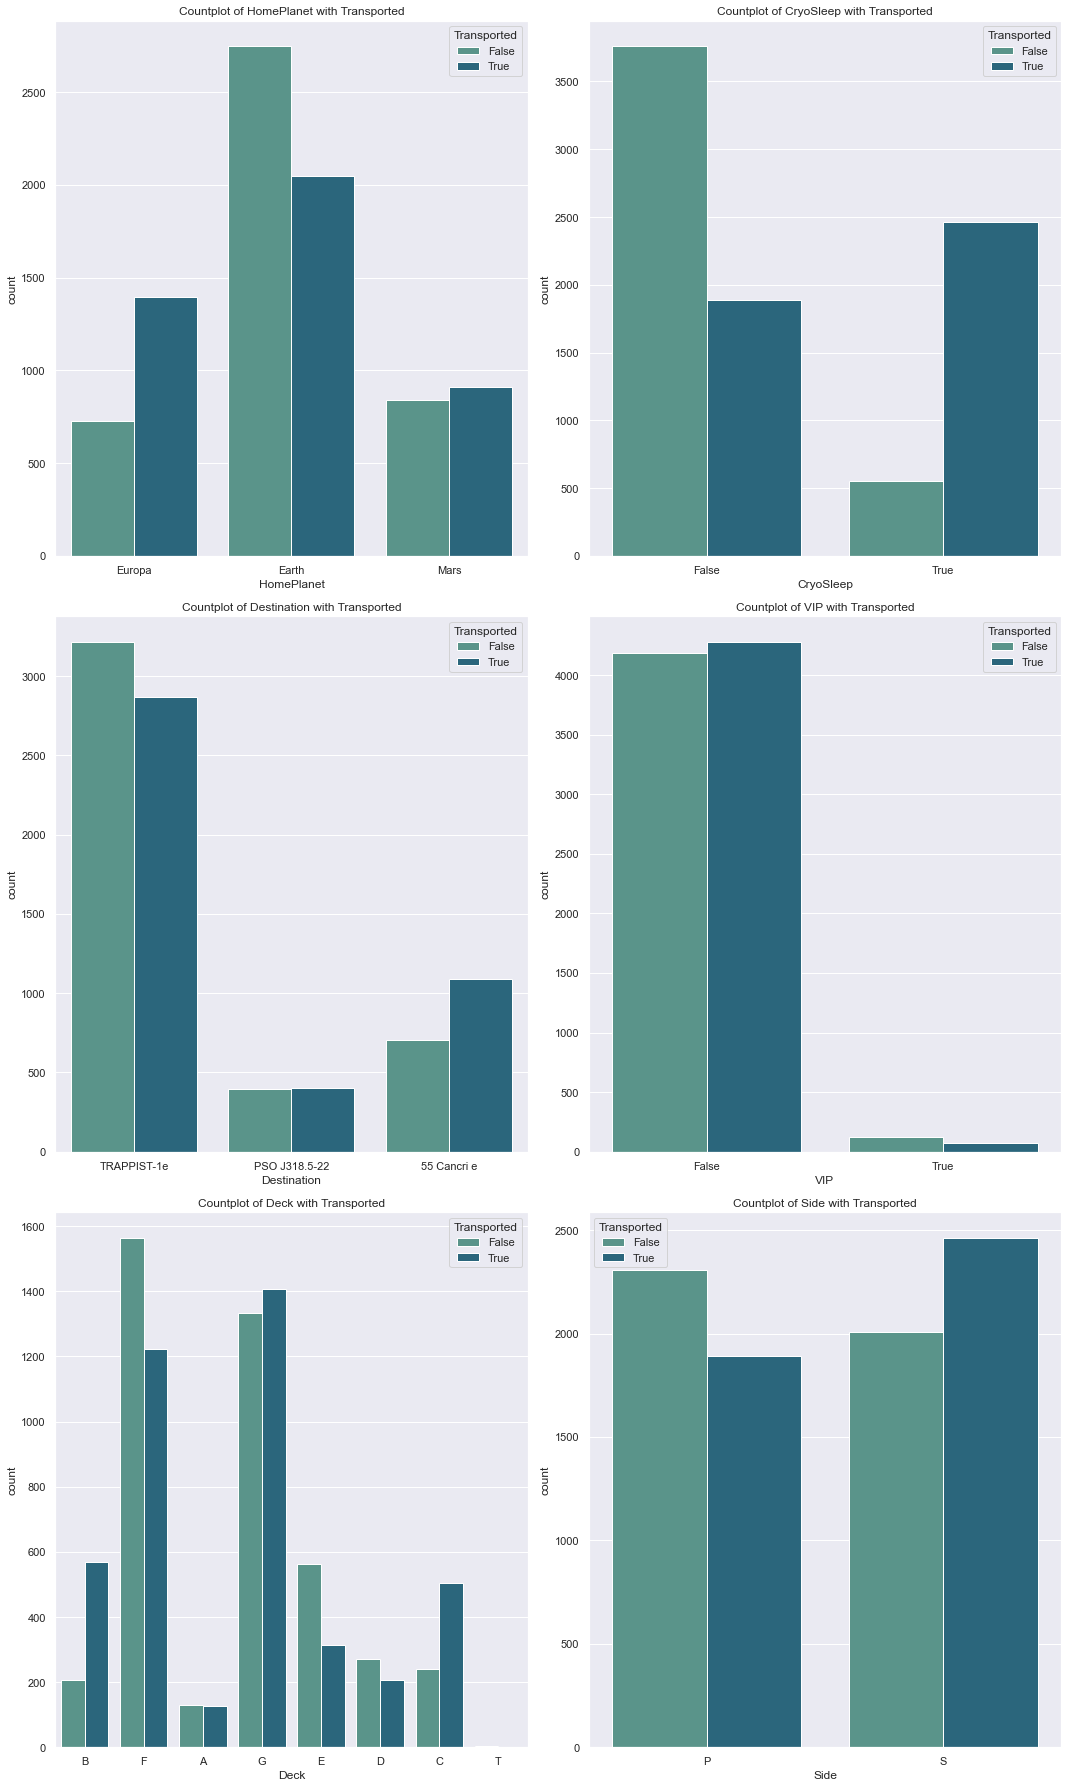

In [54]:
num_col = len(categorical.columns) - 1
num_rows = (num_col + 1) // 2

plt.figure(figsize=(15,25))

for i,column in enumerate(categorical.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(x=column, data= train, hue='Transported', palette= 'crest')
    plt.title(f'Countplot of {column} with Transported')

plt.tight_layout()
plt.show()

## MultiVariate Analysis

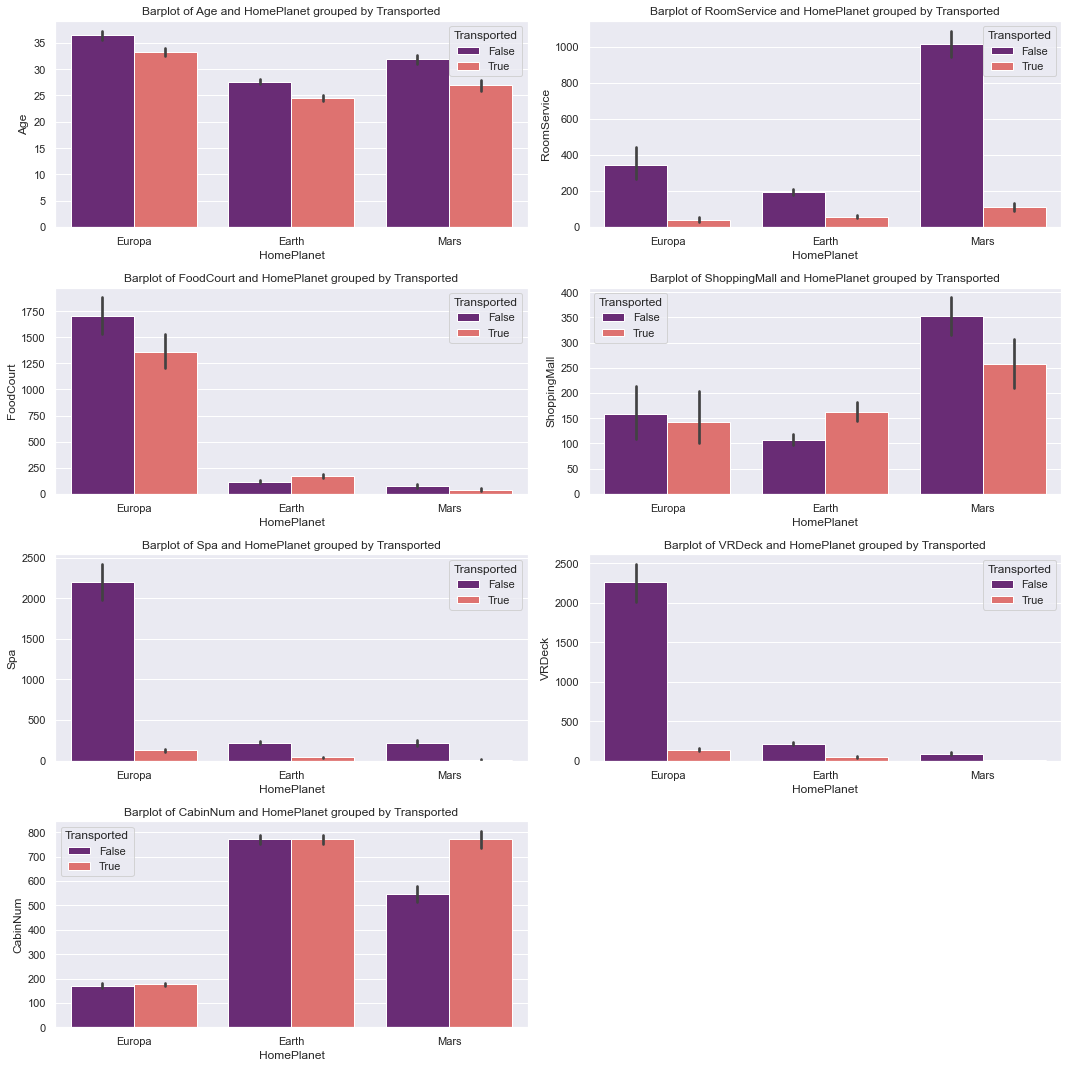

In [55]:
num_col = len(numerical.columns)
num_rows = (num_col + 1) // 2

plt.figure(figsize=(15,15))

for i,column in enumerate(numerical.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.barplot(x='HomePlanet', y=column, data= train, hue='Transported', palette= 'magma')
    plt.title(f'Barplot of {column} and HomePlanet grouped by Transported')

plt.tight_layout()
plt.show()

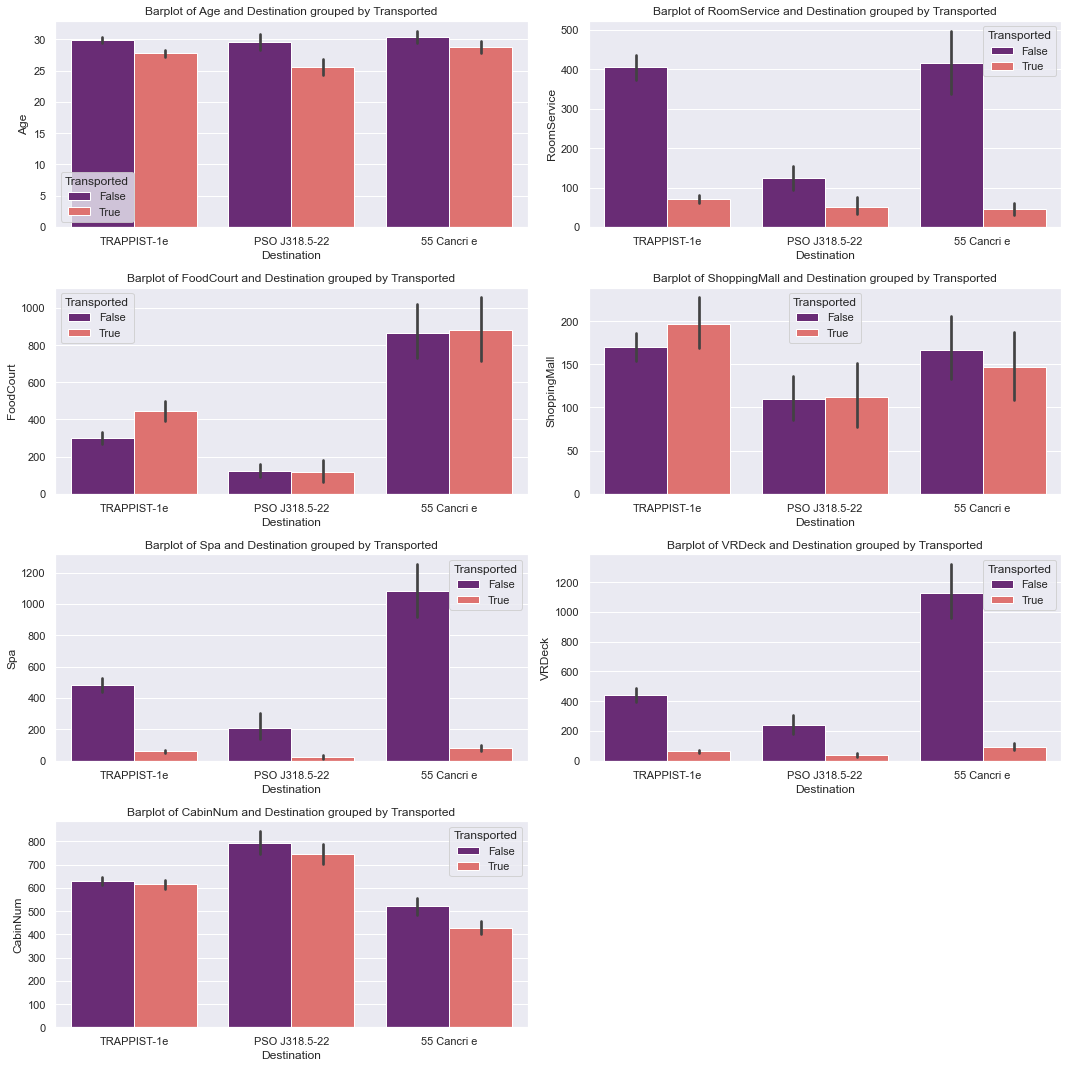

In [56]:
num_col = len(numerical.columns)
num_rows = (num_col + 1) // 2

plt.figure(figsize=(15,15))

for i,column in enumerate(numerical.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.barplot(x='Destination', y=column, data= train, hue='Transported', palette= 'magma')
    plt.title(f'Barplot of {column} and Destination grouped by Transported')

plt.tight_layout()
plt.show()

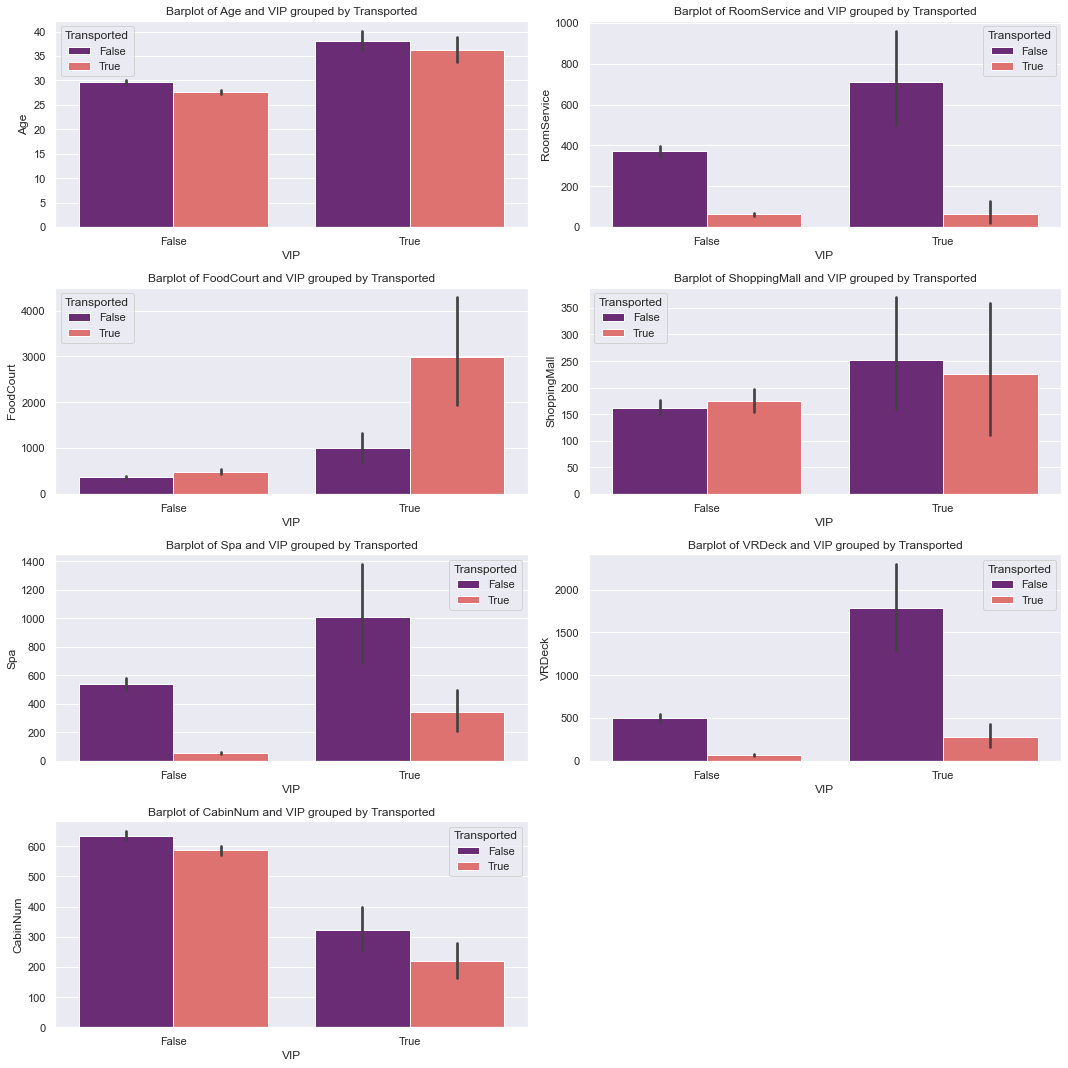

In [57]:
num_col = len(numerical.columns)
num_rows = (num_col + 1) // 2

plt.figure(figsize=(15,15))

for i,column in enumerate(numerical.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.barplot(x='VIP', y=column, data= train, hue='Transported', palette= 'magma')
    plt.title(f'Barplot of {column} and VIP grouped by Transported')

plt.tight_layout()
plt.show()

## Correlation Analysis

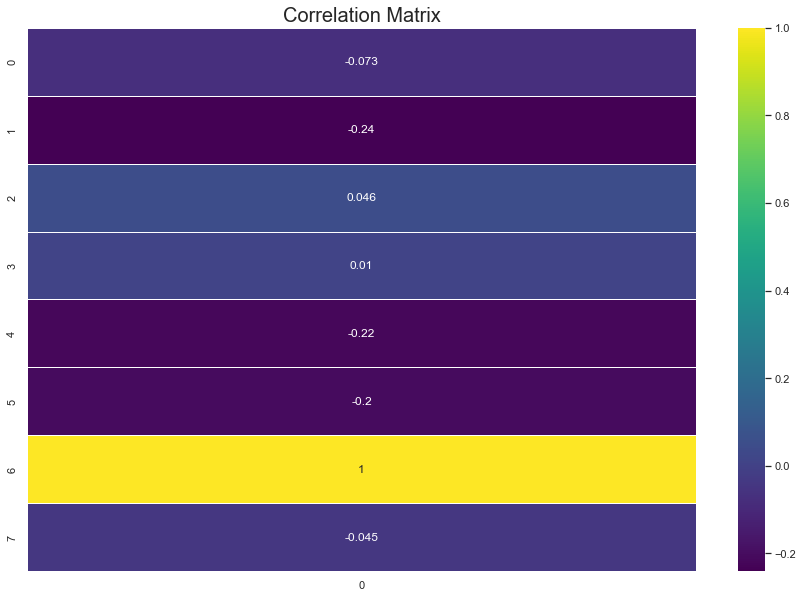

In [58]:
corr = train.corr()['Transported']

plt.figure(figsize=(15,10))

corr = np.asarray(corr).reshape(8,1)
sns.heatmap(data = corr , linecolor='white', linewidths=1, annot=True, cmap = 'viridis')
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

In [59]:
train.corr()['Transported']

Age            -0.072711
RoomService    -0.240705
FoodCourt       0.046330
ShoppingMall    0.010088
Spa            -0.218228
VRDeck         -0.204554
Transported     1.000000
CabinNum       -0.044980
Name: Transported, dtype: float64

# Encoding

In [60]:
train = pd.get_dummies(train,columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Side'],drop_first=True)

In [61]:
train['Deck'] = train['Deck'].astype('category')
train['Deck'] = train['Deck'].cat.codes

In [62]:
train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNum,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,1,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,5,0,0,0,0,0,1,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,0,0,0,1,1,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,0,0,0,1,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,5,1,0,0,0,0,1,0,1


In [63]:
x = train.drop('Transported',axis=1)
y = train['Transported']

# Scaling Independent Variables

In [64]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [65]:
x_scaled.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Side_S
0,0.707357,-0.333638,-0.281464,-0.284020,-0.271045,-0.263409,-1.882148,-1.190816,1.756367,-0.503315,-0.730676,-0.31799,0.652065,-0.153289,-1.031888
1,-0.339621,-0.168818,-0.275831,-0.242268,0.216089,-0.224662,0.370297,-1.190816,-0.569357,-0.503315,-0.730676,-0.31799,0.652065,-0.153289,0.969097
2,2.033530,-0.268617,1.956591,-0.284020,5.687248,-0.220259,-2.445259,-1.190816,1.756367,-0.503315,-0.730676,-0.31799,0.652065,6.523633,0.969097
3,0.288566,-0.333638,0.521507,0.335588,2.682814,-0.093452,-2.445259,-1.190816,1.756367,-0.503315,-0.730676,-0.31799,0.652065,-0.153289,0.969097
4,-0.898010,0.124532,-0.237654,-0.031834,0.230286,-0.261647,0.370297,-1.188842,-0.569357,-0.503315,-0.730676,-0.31799,0.652065,-0.153289,0.969097


## Split the data into train and test

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [67]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6067, 15) (2601, 15) (6067,) (2601,)


# Model Building

## Model.1: Logistic Regression

In [68]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [69]:
# Prediction
y_pred_lr_tr = logit.predict(x_train)
y_pred_lr_tst = logit.predict(x_test)

# Evaluation
con_mat_lr = confusion_matrix(y_test,y_pred_lr_tst)
cls_rpt_lr = classification_report(y_test,y_pred_lr_tst)
print('Confution Matrix')
print(con_mat_lr)
print('\n')
print('Classification Report')
print(cls_rpt_lr)
print('Training Accuracy:',accuracy_score(y_train,y_pred_lr_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_lr_tst))

Confution Matrix
[[1017  304]
 [ 252 1028]]


Classification Report
              precision    recall  f1-score   support

       False       0.80      0.77      0.79      1321
        True       0.77      0.80      0.79      1280

    accuracy                           0.79      2601
   macro avg       0.79      0.79      0.79      2601
weighted avg       0.79      0.79      0.79      2601

Training Accuracy: 0.7924839294544256
Test Accuracy: 0.786236063052672


ROC_AUC_Score: 0.7864981548069644


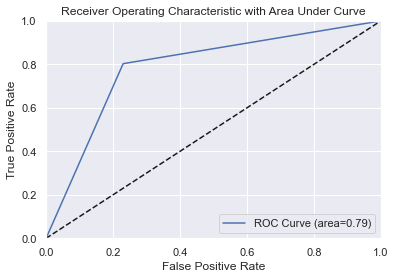

In [70]:
# ROC - AUC
roc_auc_lr = roc_auc_score(y_test,y_pred_lr_tst)
print('ROC_AUC_Score:',roc_auc_lr)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_lr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Model.2: RandomForest Classifier

In [71]:
rf = RandomForestClassifier(n_estimators=200,random_state=42,oob_score=True)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [72]:
# Prediction
y_pred_rf_tr = rf.predict(x_train)
y_pred_rf_tst = rf.predict(x_test)

# Evaluation
con_mat_rf = confusion_matrix(y_test,y_pred_rf_tst)
cls_rpt_rf = classification_report(y_test,y_pred_rf_tst)
print('Confution Matrix')
print(con_mat_rf)
print('\n')
print('Classification Report')
print(cls_rpt_rf)
print('Training Accuracy:',accuracy_score(y_train,y_pred_rf_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_rf_tst))

Confution Matrix
[[1113  208]
 [ 290  990]]


Classification Report
              precision    recall  f1-score   support

       False       0.79      0.84      0.82      1321
        True       0.83      0.77      0.80      1280

    accuracy                           0.81      2601
   macro avg       0.81      0.81      0.81      2601
weighted avg       0.81      0.81      0.81      2601

Training Accuracy: 0.9993406955661777
Test Accuracy: 0.8085351787773933


ROC_AUC_Score: 0.8079905138152914


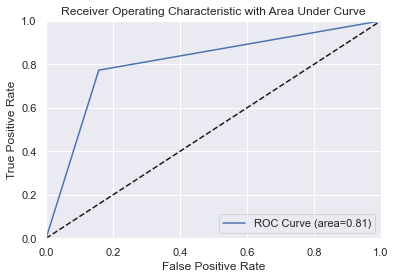

In [73]:
# ROC - AUC
roc_auc_rf = roc_auc_score(y_test,y_pred_rf_tst)
print('ROC_AUC_Score:',roc_auc_rf)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_rf)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Model.3: Gradient Boosting Classifier

In [74]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [75]:
# Prediction
y_pred_gb_tr = gb.predict(x_train)
y_pred_gb_tst = gb.predict(x_test)

# Evaluation
con_mat_gb = confusion_matrix(y_test,y_pred_gb_tst)
cls_rpt_gb = classification_report(y_test,y_pred_gb_tst)
print('Confution Matrix')
print(con_mat_gb)
print('\n')
print('Classification Report')
print(cls_rpt_gb)
print('Training Accuracy:',accuracy_score(y_train,y_pred_gb_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_gb_tst))

Confution Matrix
[[1017  304]
 [ 205 1075]]


Classification Report
              precision    recall  f1-score   support

       False       0.83      0.77      0.80      1321
        True       0.78      0.84      0.81      1280

    accuracy                           0.80      2601
   macro avg       0.81      0.80      0.80      2601
weighted avg       0.81      0.80      0.80      2601

Training Accuracy: 0.8261084555793637
Test Accuracy: 0.8043060361399462


ROC_AUC_Score: 0.8048575298069643


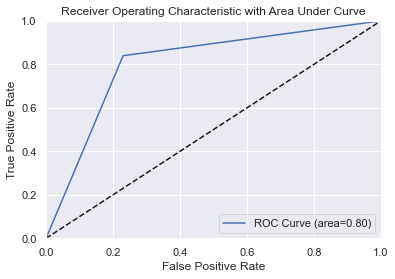

In [76]:
# ROC - AUC
roc_auc_gb = roc_auc_score(y_test,y_pred_gb_tst)
print('ROC_AUC_Score:',roc_auc_gb)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_gb)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Model.4: Adaboosting Classifier

In [77]:
adb = AdaBoostClassifier(random_state=42)
adb.fit(x_train,y_train)

AdaBoostClassifier(random_state=42)

In [78]:
# Prediction
y_pred_adb_tr = adb.predict(x_train)
y_pred_adb_tst = adb.predict(x_test)

# Evaluation
con_mat_adb = confusion_matrix(y_test,y_pred_adb_tst)
cls_rpt_adb = classification_report(y_test,y_pred_adb_tst)
print('Confution Matrix')
print(con_mat_adb)
print('\n')
print('Classification Report')
print(cls_rpt_adb)
print('Training Accuracy:',accuracy_score(y_train,y_pred_adb_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_adb_tst))

Confution Matrix
[[1016  305]
 [ 226 1054]]


Classification Report
              precision    recall  f1-score   support

       False       0.82      0.77      0.79      1321
        True       0.78      0.82      0.80      1280

    accuracy                           0.80      2601
   macro avg       0.80      0.80      0.80      2601
weighted avg       0.80      0.80      0.80      2601

Training Accuracy: 0.7951211471897148
Test Accuracy: 0.7958477508650519


ROC_AUC_Score: 0.7962759036714611


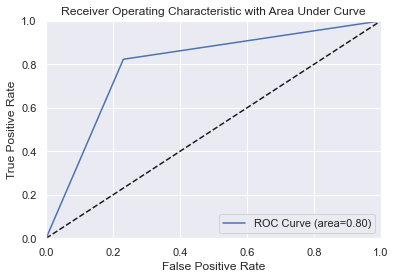

In [79]:
# ROC - AUC
roc_auc_adb = roc_auc_score(y_test,y_pred_adb_tst)
print('ROC_AUC_Score:',roc_auc_adb)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_adb_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_adb)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Model.5: XGBoost Classifier

In [80]:
xgb = XGBClassifier(n_estimators=250,learning_rate=0.1,random_state=42,max_depth=4,max_leaves=3)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [81]:
# Prediction
y_pred_xgb_tr = xgb.predict(x_train)
y_pred_xgb_tst = xgb.predict(x_test)

# Evaluation
con_mat_xgb = confusion_matrix(y_test,y_pred_xgb_tst)
cls_rpt_xgb = classification_report(y_test,y_pred_xgb_tst)
print('Confution Matrix')
print(con_mat_xgb)
print('\n')
print('Classification Report')
print(cls_rpt_xgb)
print('Training Accuracy:',accuracy_score(y_train,y_pred_xgb_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_xgb_tst))

Confution Matrix
[[1042  279]
 [ 217 1063]]


Classification Report
              precision    recall  f1-score   support

       False       0.83      0.79      0.81      1321
        True       0.79      0.83      0.81      1280

    accuracy                           0.81      2601
   macro avg       0.81      0.81      0.81      2601
weighted avg       0.81      0.81      0.81      2601

Training Accuracy: 0.8648425910664249
Test Accuracy: 0.8093041138023837


ROC_AUC_Score: 0.8096325581945495


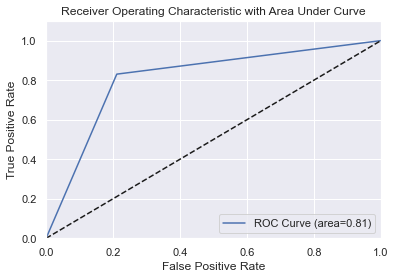

In [82]:
# ROC - AUC
roc_auc_xgb = roc_auc_score(y_test,y_pred_xgb_tst)
print('ROC_AUC_Score:',roc_auc_xgb)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_xgb)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

# Comparing Models

In [83]:
model = pd.DataFrame({'Model': ['Logistic Regression','RandomForest Classifier','Gradient Boosting Classifier',
                               'Adaboosting','XGBoost'],
                     'Accuracy': [accuracy_score(y_test,y_pred_lr_tst),accuracy_score(y_test,y_pred_rf_tst),
                                 accuracy_score(y_test,y_pred_gb_tst),accuracy_score(y_test,y_pred_adb_tst),
                                 accuracy_score(y_test,y_pred_xgb_tst)]})

In [84]:
model.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
4,XGBoost,0.809304
1,RandomForest Classifier,0.808535
2,Gradient Boosting Classifier,0.804306
3,Adaboosting,0.795848
0,Logistic Regression,0.786236


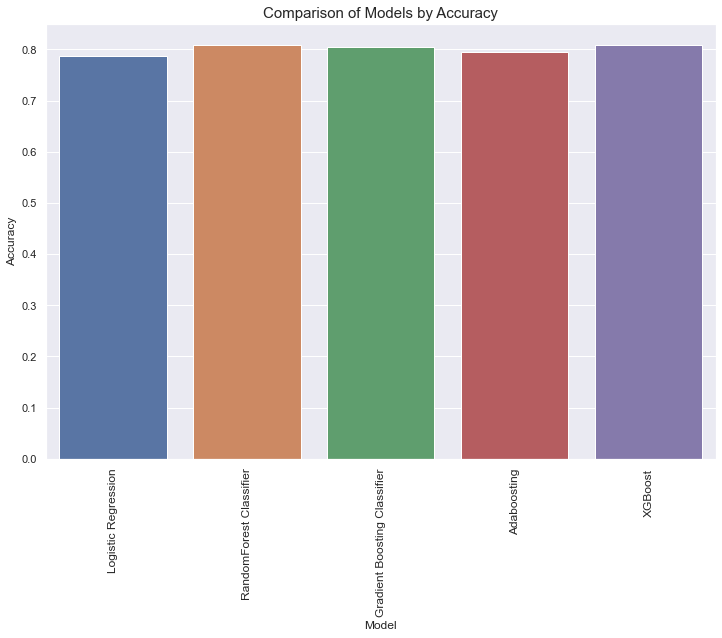

In [85]:
plt.figure(figsize=(12,8))
sns.barplot(x = model['Model'], y = model['Accuracy'])
plt.title('Comparison of Models by Accuracy', size=15)
plt.xticks(rotation=90, size=12)
plt.show()

# Hyperparameter Tuning

## GridSearchCv

In [86]:
xgb = XGBClassifier(random_state=42)

params = {'n_estimators': [200,250,300],
          'learning_rate':[0.1,0.01,0.001],
          'max_depth': [4,5,6],
          'max_leaves':[2,3,4]}

grid_search = GridSearchCV(xgb, params, scoring='accuracy', cv=5, n_jobs=-1, verbose=4)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [87]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'max_leaves': 2, 'n_estimators': 300}

In [88]:
grid_search.best_score_

0.8025385343566607

In [89]:
xgb_best = grid_search.best_estimator_
y_pred = xgb_best.predict(x_test)

print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.8066128412149174


# Prediction on test data

In [90]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,CabinNum,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [91]:
test = test.drop(['PassengerId','Name'],axis=1)

## Encoding and Scaling

In [92]:
test = pd.get_dummies(test,columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Side'],drop_first=True)

In [93]:
test['Deck'] = test['Deck'].astype('category')
test['Deck'] = test['Deck'].cat.codes

In [94]:
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Side_S
0,27.0,0.0,0.0,0.0,0.0,0.0,6,3,0,0,1,0,1,0,1
1,19.0,0.0,9.0,0.0,2823.0,0.0,5,4,0,0,0,0,1,0,1
2,31.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0,1,0,0,0,1
3,38.0,0.0,6652.0,0.0,181.0,585.0,2,1,1,0,0,0,1,0,1
4,20.0,10.0,0.0,635.0,0.0,0.0,5,5,0,0,0,0,1,0,1


In [95]:
test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [96]:
test_scaled.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Side_S
0,-0.130226,-0.333638,-0.281464,-0.284020,-0.271045,-0.263409,0.933408,-1.184893,-0.569357,-0.503315,1.368595,-0.31799,0.652065,-0.153289,0.969097
1,-0.688614,-0.333638,-0.275831,-0.284020,2.233834,-0.263409,0.370297,-1.182919,-0.569357,-0.503315,-0.730676,-0.31799,0.652065,-0.153289,0.969097
2,0.148969,-0.333638,-0.281464,-0.284020,-0.271045,-0.263409,-1.319036,-1.190816,1.756367,-0.503315,1.368595,-0.31799,-1.533589,-0.153289,0.969097
3,0.637559,-0.333638,3.881718,-0.284020,-0.110441,0.251746,-1.319036,-1.188842,1.756367,-0.503315,-0.730676,-0.31799,0.652065,-0.153289,0.969097
4,-0.618816,-0.318517,-0.281464,0.776496,-0.271045,-0.263409,0.370297,-1.180945,-0.569357,-0.503315,-0.730676,-0.31799,0.652065,-0.153289,0.969097


## Predict Transported

In [99]:
Transported = xgb_best.predict(test_scaled)

In [100]:
Transported

array([1, 0, 1, ..., 1, 1, 1])

In [102]:
PassengerId = test_df['PassengerId']
output = pd.DataFrame({'PassengerId':PassengerId,'Transported':Transported})

In [103]:
output.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [110]:
output['Transported'] = output['Transported'].astype('bool')

In [113]:
output['Transported'] = output['Transported'].replace(1,True)
output['Transported'] = output['Transported'].replace(0,False)

In [114]:
output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
